# Data Exploration

By Patricia


# Set up notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import seaborn as sns
sns.set(style='ticks')
import os
import sys

In [2]:
data_dir = r'../datar/'
os.listdir(data_dir)

['gender_submission.csv', 'test.csv', 'train.csv']

In [3]:
sys.path.append('../scripts/')
import titanic_plot as titanic_plot

%load_ext autoreload
%autoreload 2

# Import training data

In [4]:
train_df = pd.read_csv(os.path.join(data_dir,'train.csv'))

In [5]:
train_df.shape

(891, 12)

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Initial look

Following this tutorial: https://www.districtdatalabs.com/how-to-start-your-first-data-science-project

Starting with questions:  
1. What do the variables look like? For example, are they numerical or categorical data. If they are numerical, what are their distribution; if they are categorical, how many are they in different categories?  
2. Are the numerical variables correlated?  
3. Are the distributions of numerical variables the same or different among survived and not survived? Is the survival rate different for different values? For example, were people more likely to survive if they were younger?  
4. Are there different survival rates in different categories? For example, did more women survived than man?

I'm going to work my way through these questions. 

## 1. What do the variables look like?

For example, are they numerical or categorical data. If they are numerical, what are their distribution; if they are categorical, how many are they in different categories?  

Details for the data are here: 

In [9]:
train_df.describe() # Default is numerical columns only

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_df.describe(include=['O']) # Look at strings

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Mangan, Miss. Mary",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


A few observations:

* Quantitative data
    * There are six quantitative columns: `['PassengerId','Pclass','Age','SibSp','Parch','Fare]`
    * Data is missing for `Age`. (Only 714 entries out of 891)  
    * All other numerical columns have data for every passenger  
* Categorical data
    * There are five quantitative columns: `['Name','Sex','Ticket','Cabin','Embarked']`
    * `Cabin` and `Embarked` are incomplete. Cabin only has 204 samples.
    * `Name`, `Ticket`, `Cabin` are mostly unique to each person, so these will not be useful for generalizing trends across the population
    * `Embarked` and `Sex` only have a few possible values. We can convert these into numerical columns for convenience. 
    
Start by converting `Embarked` and `Sex` to categories and then to numerical columns.

In [11]:
Embarked_dict = {'C':0,'Q':1,'S':2}
Sex_dict = {'male':0,'female':1}

In [12]:
train_df['Embarked_num'] = train_df['Embarked'].map(Embarked_dict)
train_df['Sex_num'] = train_df['Sex'].map(Sex_dict)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_num,Sex_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.0,0


Run `.describe()` again to see quantitative metrics for those newly created columns. 

In [13]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_num,Sex_num
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.535433,0.352413
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.792088,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,2.000000,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,2.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,2.000000,1.000000


In [14]:
train_df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
Embarked_num    float64
Sex_num           int64
dtype: object

Look at the distributions for each variable, starting with a straight histogram. 

In [15]:
num_vars = ['PassengerId','Pclass','Age','SibSp','Parch','Fare','Embarked_num','Sex_num']
cat_vars = ['Name','Ticket','Cabin']

# 2: Are the numerical variables correlated?

Calculate the correlation coefficient for numerical data. Use [`pandas.DataFrame.corr`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

In [17]:
corr = train_df.corr()
corr_to_plot = pd.melt(corr.reset_index(), id_vars = 'index')
corr_to_plot.columns = ['x','y','z']

[This](https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec) tutorial makes a cool heatmap of the correlation matrix.

C:\Users\pfsch\AppData\Roaming\Python\Python37\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


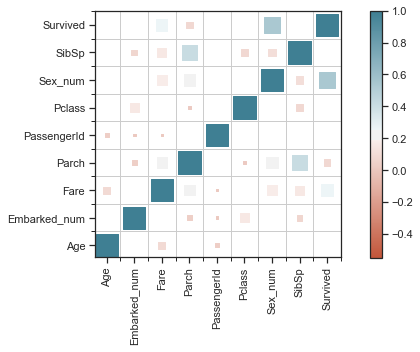

In [18]:
titanic_plot.advanced_heatmap(corr_to_plot['x'],corr_to_plot['y'],corr_to_plot['z']);

This shows us that the variable most correlated with `Survived` is the gender. 

# 3. Are the distributions of numerical variables the same or different among survived and not survived? 

Is the survival rate different for different values? For example, were people more likely to survive if they were younger?

Start by calculating likelihood of survival vs. variable for each quantitative value directly.

In [19]:
def divide_smart(a,b):
    """
    Divide array a by b. If b values are zero, set result to zero.    
    """
    c = np.divide(a, b, out=np.zeros(b.shape), where=b!=0)
    return c

Go back to the original histogram, but now make the bars colored by likelihood of survival. 

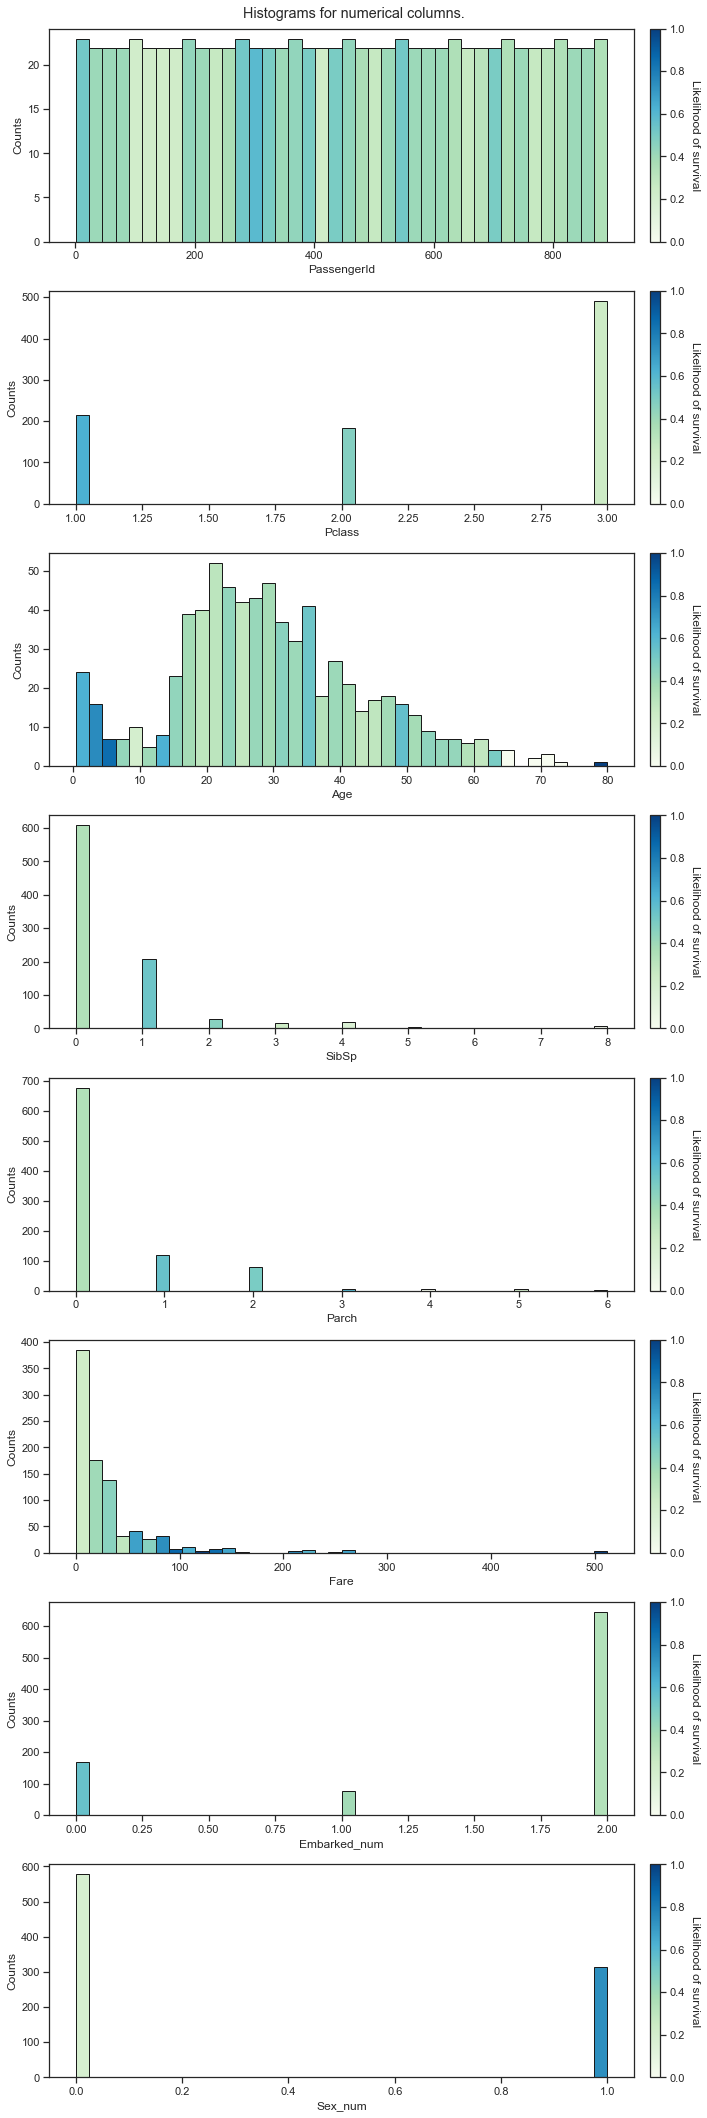

In [22]:
fig, axes = plt.subplots(nrows = len(num_vars), sharex = False, figsize=(10,30))
my_cmap = cm.get_cmap('GnBu')

mask_survived = train_df['Survived'] == True

for idx, ax in enumerate(axes):
    var = num_vars[idx]
    hist_all, bin_edges = np.histogram(train_df[var].dropna(),bins=40)
    hist_survived = np.histogram(train_df.loc[mask_survived,var].dropna(),bins=bin_edges)[0]
    prob_survived = divide_smart(hist_survived, hist_all)
    
    bin_width = bin_edges[1]-bin_edges[0]
    bin_centers = bin_edges[:-1] + bin_width/2
    
    this_norm = Normalize(0,1)
    br = ax.bar(bin_centers, hist_all, width = bin_width, 
                color=my_cmap(this_norm(prob_survived)),edgecolor='k')
    
    ax.set_xlabel(var)
    ax.set_ylabel('Counts')
    
    sm = cm.ScalarMappable(cmap=my_cmap, norm=this_norm)
    cbar = plt.colorbar(sm,ax=ax,fraction=0.043,pad=0.025)
    cbar.set_label('Likelihood of survival',rotation=270,labelpad=15)
    
fig.suptitle('Histograms for numerical columns.');
fig.tight_layout()
fig.subplots_adjust(top=0.97)

# 4. Are there different survival rates in different categories? 

Since we converted `Embarked` and `Sex` into quantitative columns, we don't need to evaluate those. Look at the others, `Name`, `Ticket`, and `Cabin`.

`Name` and `Ticket` look messy. I'm going to try what Ivan suggested, to calculate likelihood of survival vs. Cabin (present or `NaN`).

In [23]:
mask_cabin_nan = train_df['Cabin'].isnull()

In [24]:
print('Likelihood of survival, Cabin == NaN:', train_df.loc[mask_cabin_nan,'Survived'].mean())
print('Likelihood of survival, Cabin != NaN:', train_df.loc[~mask_cabin_nan,'Survived'].mean())

Likelihood of survival, Cabin == NaN: 0.29985443959243085
Likelihood of survival, Cabin != NaN: 0.6666666666666666
